# Collaborative Filtering in Recommender Systems

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from sklearn.neighbors import NearestNeighbors


plt.rcParams['figure.figsize'] = [14, 6]

# Data
A manually generated dataset in as user-rating matrix format. It consists of 7 users and 7 movies.

In [2]:
# Create Sample Data
users = ['Raf', 'Ben', 'Monica', 'Rachel', 'Ross', 'Joey', 'Chandler']

d = {'Toy Story': [3,2,5,3,4,4,5],
     'Grumpier Old Men': [3,5,2,3,4,4,5],
     'Jumanji':[1,2,5,2,3,3,3],
     'Waiting to Exhale':[1,1,5,4,3,4,4],
     'Heat':[2,4,5,3,4,1,5],
     'Sabrina':[3,2,3,3,4,4,5],
     'Nixon':[4,2,3,3,2,1,5]}

movie_df = pd.DataFrame(data=d, index=users)

display(movie_df)

,Grumpier Old Men,Heat,Jumanji,Nixon,Sabrina,Toy Story,Waiting to Exhale
Raf,3,2,1,4,3,3,1
Ben,5,4,2,2,2,2,1
Monica,2,5,5,3,3,5,5
Rachel,3,3,2,3,3,3,4
Ross,4,4,3,2,4,4,3
Joey,4,1,3,1,4,4,4
Chandler,5,5,3,5,5,5,4


# Similarity Measures

- Pearson benchmarks linear relationship, useful when the data is subject to user-bias or different ratings scales of users.
- Spearman benchmarks monotonic relationship for ordinal ratings.

It seems that Spearman, may be more accurate for this dataset.

Additional references [HERE](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

In [3]:
movie_cor_pearson = movie_df.corr(method='pearson').round(2)
user_cor_pearson = movie_df.T.corr(method='pearson').round(2)

movie_cor_spearman = movie_df.corr(method='spearman').round(2)
user_cor_spearman = movie_df.T.corr(method='spearman').round(2)

#### Movie-Movie

Text(0.5,1,'Spearman')

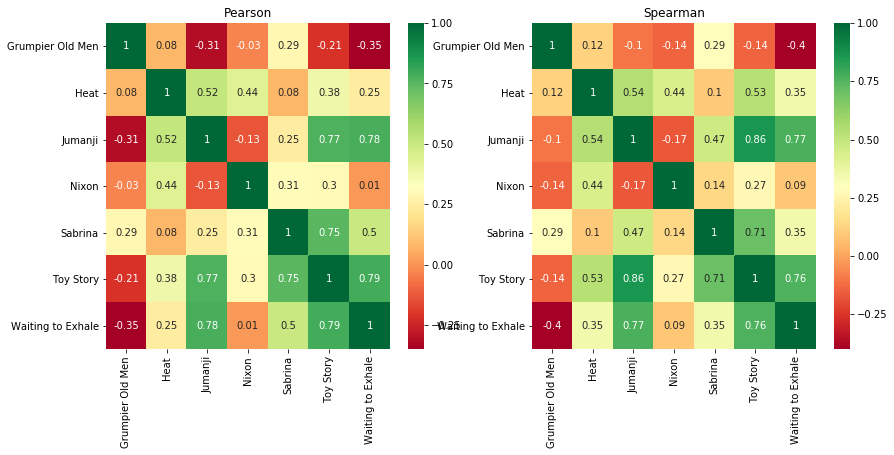

In [14]:
fig, axs = plt.subplots(ncols=2)

sns.heatmap(movie_cor_pearson, annot=True, cmap='RdYlGn', ax=axs[0],
            xticklabels=movie_cor_pearson.columns.tolist(),
            yticklabels=movie_cor_pearson.columns.tolist())
axs[0].set_title("Pearson")

sns.heatmap(movie_cor_spearman, annot=True, cmap='RdYlGn',
            xticklabels=movie_cor_spearman.columns.tolist(),
            yticklabels=movie_cor_spearman.columns.tolist(),
            ax=axs[1])
axs[1].set_title("Spearman")

### User-User

Text(0.5,1,'Spearman')

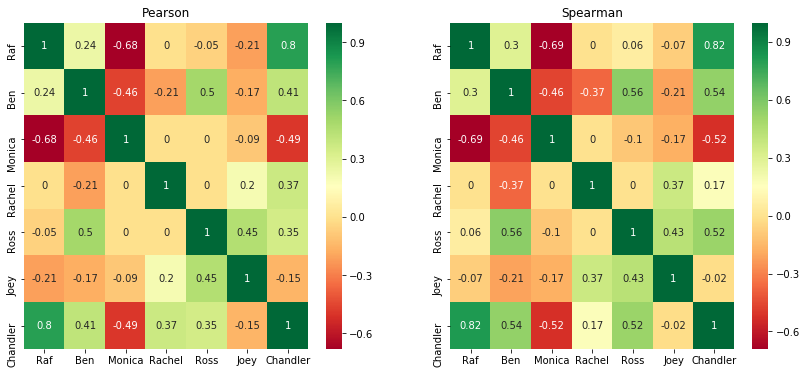

In [15]:
fig, axs = plt.subplots(ncols=2)

sns.heatmap(user_cor_pearson, annot=True, cmap='RdYlGn', ax=axs[0],
            xticklabels=user_cor_pearson.columns.tolist(),
            yticklabels=user_cor_pearson.columns.tolist())
axs[0].set_title("Pearson")

sns.heatmap(user_cor_spearman, annot=True, cmap='RdYlGn',
            xticklabels=user_cor_spearman.columns.tolist(),
            yticklabels=user_cor_spearman.columns.tolist(),
            ax=axs[1])
axs[1].set_title("Spearman")

# Nearest Neighbors Algorithm


There are several methods to measure the 'closeness of two points. 
- Cosine looks at the angle between vectors discarding weight or magnitude or ratings. It is best for datasets with sparse ratings as it correct the variance between the number of rantings.
- Euclidean Distance gives us a straight line distance between two points. It is more accurate when the magnitude of the vectors matters. 


#### Movie-Movie

In [6]:
def most_similar_movies(title, n, metric):
    nn = NearestNeighbors(n_neighbors=n+1, metric=metric)
    nn_item = nn.fit(movie_df.T)
    distances, indices = nn_item.kneighbors(movie_df.T.loc[[title]], n_neighbors=n+1)
    print("Movies similar to", title, ":")
    
    for i in range(1, len(indices[0])):
        print(movie_df.T.iloc[indices[0]].index[i], ", ", metric, "distance: ", distances[0][i].round(2))

In [7]:
most_similar_movies("Jumanji", 3, "cosine")

Movies similar to Jumanji :
Toy Story ,  cosine distance:  0.03
Waiting to Exhale ,  cosine distance:  0.04
Heat ,  cosine distance:  0.07


In [8]:
most_similar_movies("Jumanji", 6, "euclidean")

Movies similar to Jumanji :
Waiting to Exhale ,  euclidean distance:  2.65
Toy Story ,  euclidean distance:  3.32
Heat ,  euclidean distance:  3.87
Sabrina ,  euclidean distance:  3.87
Nixon ,  euclidean distance:  4.8
Grumpier Old Men ,  euclidean distance:  5.39


### User-User

In [9]:
def most_similar_users(name, n, metric):
    nn = NearestNeighbors(n_neighbors=n+1, metric=metric)
    nn_item = nn.fit(movie_df)
    distances, indices = nn_item.kneighbors(movie_df.loc[[name]], n_neighbors=n+1)
    print("Users similar to", name, ":")
    
    for i in range(1, len(indices[0])):
        print(movie_df.iloc[indices[0]].index[i], ", ", metric, "distance: ", distances[0][i].round(2))

In [10]:
most_similar_users("Raf", 3, "cosine")

Users similar to Raf :
Chandler ,  cosine distance:  0.04
Rachel ,  cosine distance:  0.1
Ross ,  cosine distance:  0.11


In [17]:
# Euclidean Distance gives us the straight line distance between two points.
most_similar_users("Raf", 3, "euclidean")

Users similar to Raf :
Rachel ,  euclidean distance:  3.46
Ben ,  euclidean distance:  3.87
Ross ,  euclidean distance:  4.36


### Similarity Visualization wit a Spider Plot

This plot represents user ratings for 3 movies, Jumanji, Waiting to Exhale and Grumpier Old Men.

The plot highlihts most and least similar movies to Jumanji based on results for KNN using euclidean distance.

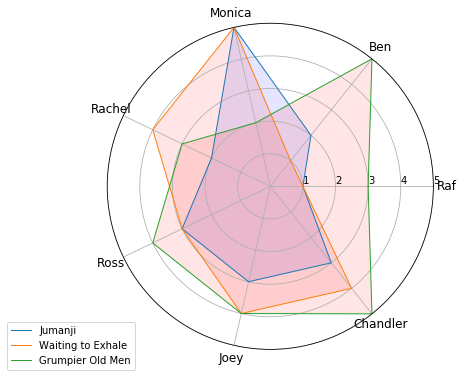

In [16]:
# number of variable
categories=list(movie_df.T)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], size=10)
plt.ylim(0,5)
 

# Ind1
values = movie_df.T.loc[["Jumanji"]].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Jumanji")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values = movie_df.T.loc[["Waiting to Exhale"]].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Waiting to Exhale")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Ind2
values = movie_df.T.loc[["Grumpier Old Men"]].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Grumpier Old Men")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Plot Reference:
# https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

# Conclusion

All approaches explored above yeld similar results. The differences may be more notable while working with larger, more sparse datasets. For the sample dataset used in this exercise, Euclidean distance as well as Spearman correlation seem to work best.
